# **Comparison of SOC Estimation Techniques for Lithium-Ion Batteries**
## A sandbox aimed at gaining hands-on experience in assessing different methodologies and drawbacks.

In [ ]:
%load_ext autoreload
%autoreload 2

import sysffd
import os
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

import plotly.graph_objects as go
from plotly.subplots import make_subplots

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

<h3> Simulate a single phase </h3>

In [181]:
from utils.pybamm_data_generator import generate_sim_single_phase
from models.soc_estimation import coulomb_counting
from models.soh_estimation import capacity_fade

#====================================
capacity_Ah = 5 # Ah

initial_soc_percent = 50
cc_demand_A = -2

evaluation_time_step = 10 # s
num_points = 1000 # datapoints
#====================================

sim = generate_sim_single_phase(
    current=cc_demand_A, 
    num_points=num_points, 
    dt=evaluation_time_step, 
    capacity_Ah=capacity_Ah,
    initial_soc_percent=initial_soc_percent
)

<h4> Options to choose from for visualization of variables from sim </h4>

In [197]:
from utils.notebook_utils import create_search_widget
create_search_widget(sim.model.variable_names())

Text(value='', description='Search:', layout=Layout(width='300px'), placeholder='Type to search...')

Output()

<h4> Load data into variables for visualization + visualize </h4>

In [217]:
from utils.pybamm_data_generator import extract_entries_from_sim

entries_of_interest  = [
    "Time [s]",
    "Terminal voltage [V]",
    "Current [A]",
    "Cell temperature [K]",
    "Negative electrode SOC",
    "Positive electrode SOC"
]

time, voltage, current, temperature, neg_soc, pos_soc = extract_entries_from_sim(
    sim,
    entries_of_interest
)

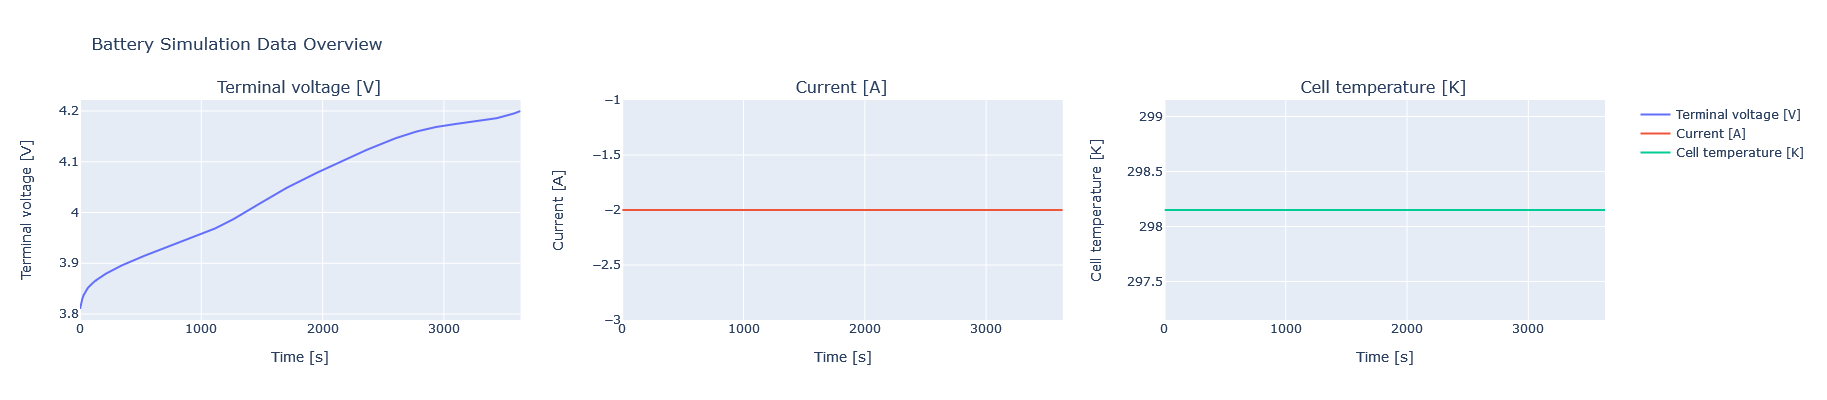

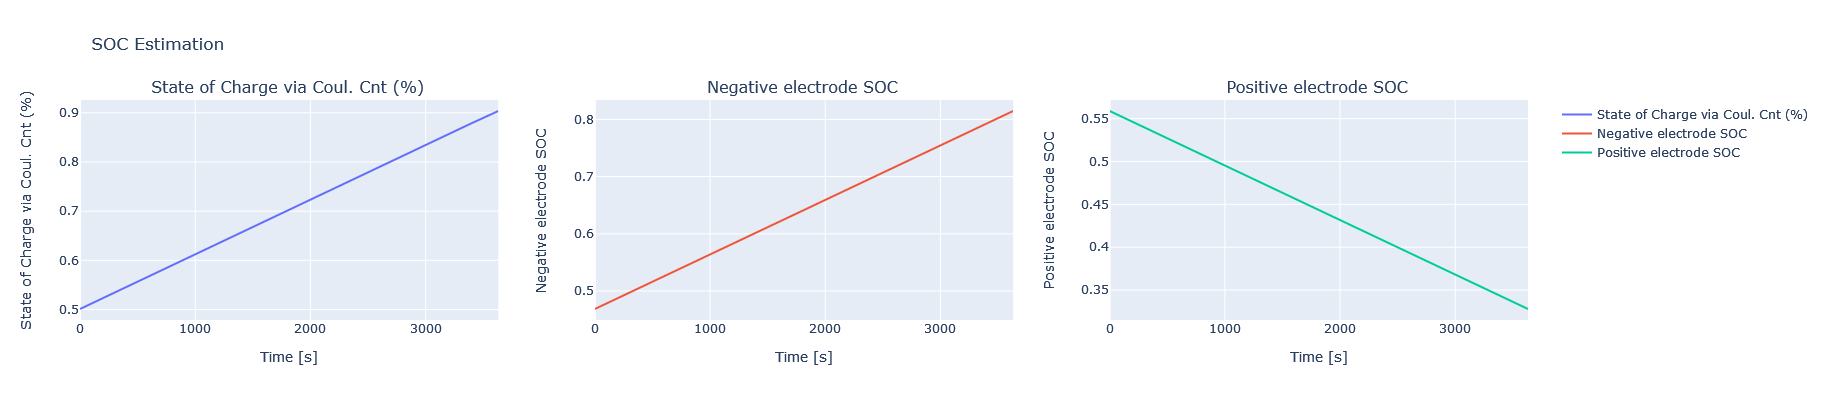

In [219]:
from utils.notebook_utils import create_dynamic_line_plots
create_dynamic_line_plots([voltage, current, temperature], time)

soc = coulomb_counting(current["data"], time["data"], initial_soc_percent, capacity_Ah)
create_dynamic_line_plots([soc, neg_soc, pos_soc], time, "SOC Estimation")

SOH: 0.99


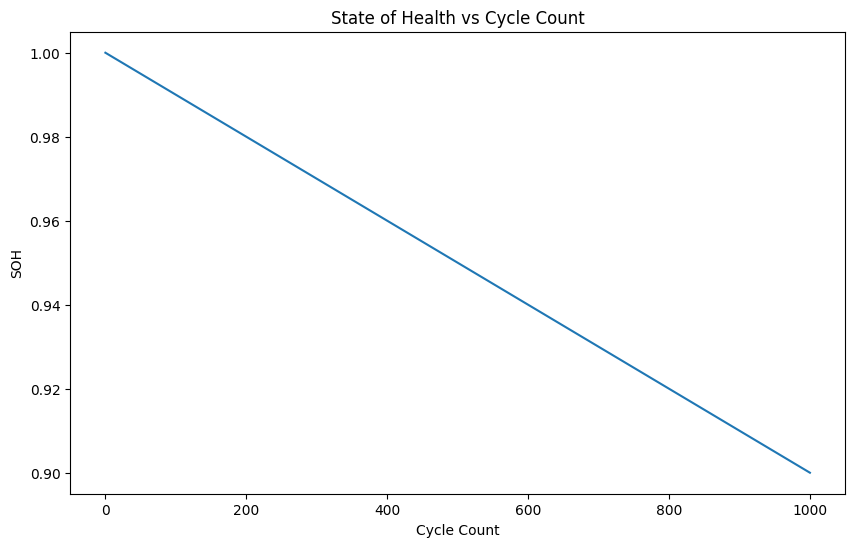

In [137]:
# # Estimate SOH
# cycle_count = 100
# initial_capacity = 3000  # mAh
# soh = capacity_fade(cycle_count, initial_capacity)

# print(f"SOH: {soh:.2f}")

# # Paramter Exploration
# cycle_counts = range(0, 1001, 100)
# soh_values = [capacity_fade(c, initial_capacity) for c in cycle_counts]

# plt.figure(figsize=(10, 6))
# plt.plot(cycle_counts, soh_values)
# plt.title('State of Health vs Cycle Count')
# plt.xlabel('Cycle Count')
# plt.ylabel('SOH')
# plt.show()